In [3]:
#Import the libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

import numpy as np

#Read the CSV File
data_frame=pd.read_csv('..\data\ACME-HappinessSurvey2020.csv', encoding = 'unicode_escape', sep=',', header=0)
data_frame.head()


,Y,X1,X2,X3,X4,X5,X6
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [4]:
# This operation informs the number of rows and columns
data_frame.shape

(126, 7)

In [5]:
# Look for null data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Y       126 non-null    int64
 1   X1      126 non-null    int64
 2   X2      126 non-null    int64
 3   X3      126 non-null    int64
 4   X4      126 non-null    int64
 5   X5      126 non-null    int64
 6   X6      126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


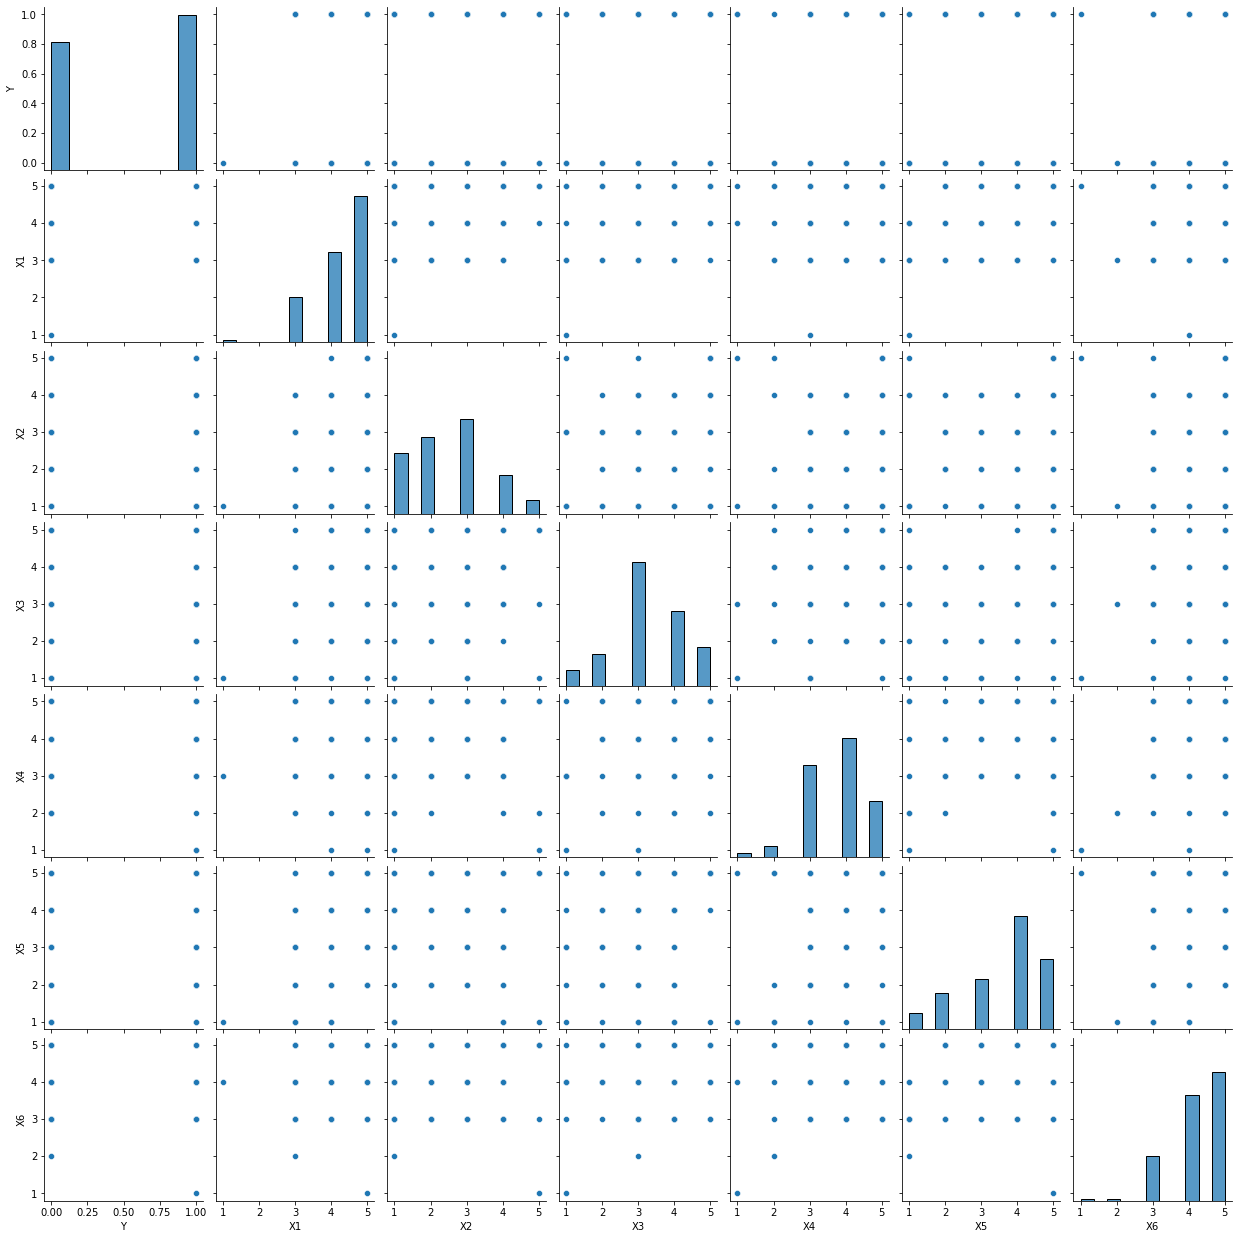

In [6]:
# Visulize the relation between two columns
sb.pairplot(data_frame, palette='husl')
plt.show()

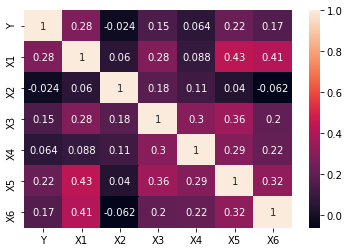

In [7]:
# Find the correlation between y and X
sb.heatmap(data_frame.corr(),annot=True)
plt.show()

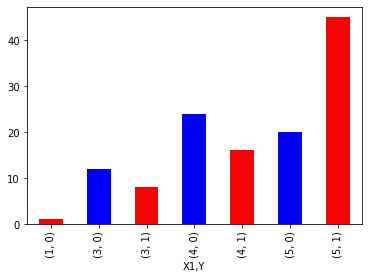

In [8]:
# check the effect of x1 on y 
data_frame.groupby(['X1','Y']).size().plot.bar(color=('r','b'))
plt.show()

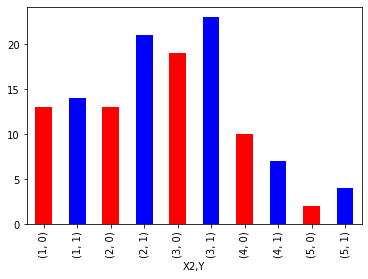

In [9]:
# check the effect of x2 on y 
data_frame.groupby(['X2','Y']).size().plot.bar(color=('r','b'))
plt.show()

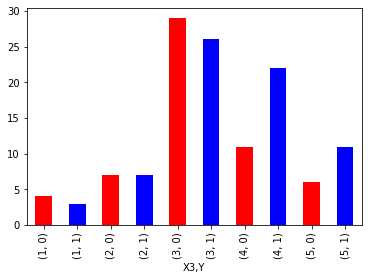

In [10]:
# check the effect of x3 on y 
data_frame.groupby(['X3','Y']).size().plot.bar(color=('r','b'))
plt.show()

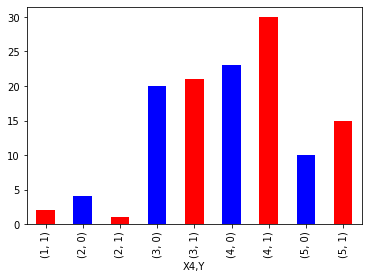

In [11]:
# check the effect of x4 on y 
data_frame.groupby(['X4','Y']).size().plot.bar(color=('r','b'))
plt.show()

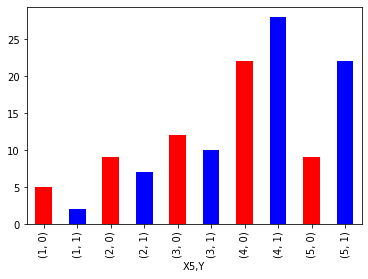

In [12]:
# check the effect of x5 on y 
data_frame.groupby(['X5','Y']).size().plot.bar(color=('r','b'))
plt.show()

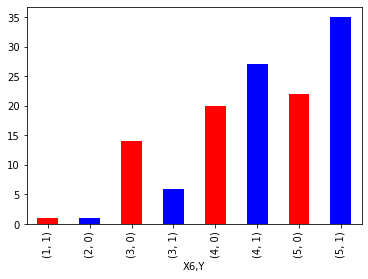

In [13]:
# check the effect of x6 on y 
data_frame.groupby(['X6','Y']).size().plot.bar(color=('r','b'))
plt.show()

In [14]:
'''Data Analysis using whole data'''
y=data_frame['Y']
training_set=data_frame.drop(['Y'],axis=1)
training_set.head()

,X1,X2,X3,X4,X5,X6
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


In [15]:
#Data partitioning for later validation
X_train, X_test, y_train, y_test=train_test_split(training_set, y, test_size=0.30)

In [32]:
#Apply Logistic Regression 
classifier=LogisticRegression()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# Model Evaluation using confition matrix
result=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(result)
result1=accuracy_score(y_test,y_pred)
print('Accuracy:',result1)

#Cross Validation:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(classifier, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Confusion Matrix:
[[ 5 15]
 [ 2 16]]
Accuracy: 0.5526315789473685
Cross Validation Scores:  [0.66666667 0.66666667 0.44444444 0.77777778 0.77777778 0.66666667
 0.44444444 0.22222222 0.625      0.625     ]
Average CV Score:  0.5916666666666666
Number of CV Scores used in Average:  10


In [33]:
#Apply Decision Tree Classifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# Model Evaluation using confition matrix
result=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(result)
result1=accuracy_score(y_test,y_pred)
print('Accuracy:',result1)

#Cross Validation:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(classifier, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Confusion Matrix:
[[ 5 15]
 [ 2 16]]
Accuracy: 0.5526315789473685
Cross Validation Scores:  [0.66666667 0.66666667 0.44444444 0.66666667 0.77777778 0.66666667
 0.44444444 0.33333333 0.5        0.625     ]
Average CV Score:  0.5791666666666667
Number of CV Scores used in Average:  10


In [34]:
#Apply Random Forest Classifier
classifier=RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# Model Evaluation using confition matrix
result=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(result)
result1=accuracy_score(y_test,y_pred)
print('Accuracy:',result1)

#Cross Validation:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(classifier, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))


Confusion Matrix:
[[ 3 17]
 [ 0 18]]
Accuracy: 0.5526315789473685
Cross Validation Scores:  [0.66666667 0.66666667 0.44444444 0.44444444 0.77777778 0.55555556
 0.44444444 0.33333333 0.375      0.625     ]
Average CV Score:  0.5333333333333334
Number of CV Scores used in Average:  10


In [53]:
data_for_training=data_frame.drop(['X1','X2','X3','X5','X6'], axis=1)
data_for_training.head()

,Y,X4
0,0,4
1,0,5
2,1,3
3,0,3
4,0,3


In [54]:
y=data_for_training['Y']
training_set=data_for_training.drop(['Y'],axis=1)
training_set.head()

,X4
0,4
1,5
2,3
3,3
4,3


In [55]:
#Data partitioning for later validation
X_train, X_test, y_train, y_test=train_test_split(training_set, y, test_size=0.30)

In [56]:
#Apply Decision Tree Classifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [57]:
# Model Evaluation using confition matrix
result=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(result)
result1=accuracy_score(y_test,y_pred)
print('Accuracy:',result1)

#Cross Validation:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(classifier, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Confusion Matrix:
[[10  4]
 [18  6]]
Accuracy: 0.42105263157894735
Cross Validation Scores:  [0.22222222 0.44444444 0.44444444 0.44444444 0.44444444 0.66666667
 0.22222222 0.33333333 0.5        0.25      ]
Average CV Score:  0.39722222222222225
Number of CV Scores used in Average:  10


In [58]:
#Apply Logistic Regression 
classifier=LogisticRegression()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# Model Evaluation using confition matrix
result=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(result)
result1=accuracy_score(y_test,y_pred)
print('Accuracy:',result1)

#Cross Validation:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(classifier, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Confusion Matrix:
[[ 8  6]
 [ 9 15]]
Accuracy: 0.6052631578947368
Cross Validation Scores:  [0.22222222 0.33333333 0.44444444 0.55555556 0.44444444 0.55555556
 0.22222222 0.55555556 0.375      0.25      ]
Average CV Score:  0.3958333333333333
Number of CV Scores used in Average:  10


In [59]:
#Apply Random Forest Classifier
classifier=RandomForestClassifier()
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

# Model Evaluation using confition matrix
result=confusion_matrix(y_test,y_pred)
print('Confusion Matrix:')
print(result)
result1=accuracy_score(y_test,y_pred)
print('Accuracy:',result1)

#Cross Validation:
k_folds = KFold(n_splits = 10)

scores = cross_val_score(classifier, X_train, y_train, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

Confusion Matrix:
[[10  4]
 [18  6]]
Accuracy: 0.42105263157894735
Cross Validation Scores:  [0.22222222 0.44444444 0.44444444 0.44444444 0.44444444 0.55555556
 0.22222222 0.33333333 0.5        0.25      ]
Average CV Score:  0.38611111111111107
Number of CV Scores used in Average:  10
